In [5]:
import pandas as pd
from PIL import Image

### Analyzing the Difference of Cocoa Percent between Different Companies

Even though the dataset is said to include over 2500 dark chocolate bars, different dark chocolate bars have different percentage of cocoa included. In the following analysis, we are trying to see if there would be a difference in the cocoa percentage of chocolate bars produced by different companies. Specifically, we calculate the mean, median, maximum and minimum cocoa percent of chocolate bars made by each company. 

In [7]:
pd.read_csv("tables/company_cocoa_percent.csv")

,Company (Manufacturer),mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
0,Pacari,100.0,100.0,100.0,100.0
1,Coppeneur,100.0,100.0,100.0,100.0
2,TCHO,99.0,99.0,99.0,99.0
3,Bouga Cacao (Tulicorp),88.5,88.5,100.0,77.0
4,Pralus,87.5,87.5,100.0,75.0
...,...,...,...,...,...
399,Machu Picchu Trading Co.,62.5,62.5,70.0,55.0
400,Two Ravens,60.0,60.0,60.0,60.0
401,La Pepa de Oro,60.0,60.0,60.0,60.0
402,Valrhona,60.0,60.0,60.0,60.0


From the table above, we can clearly see that there is a difference in the cocoa percent of the dark chocolate bars produced by different companies, and the range of cocoa percent is from 60% to 100%.

### Analyze if the Average Cocoa Percent of Different Chocolate Bars has changed Over Times

Moving on, we will analyze to see if the averge cocoa percent of different chocolate bars from different companies has changed over times. Intuitively, there shouldn't be any big differences between the average cocoa percent of different years since a change in cocoa percent in different years would mean that many companies suddenly decided to change their cocoa percent included in their bars in that year (which would result in a big change in the average cocoa percent for the year after), and that is not likely to happen. We will use the following section to verify our assumptions.

In [2]:
pd.read_csv("tables/year_cocoa_percent.csv")

,Review Date,mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
0,2006,75.454545,75.0,100.0,70.0
1,2007,73.913043,70.0,100.0,60.0
2,2008,75.392857,70.5,100.0,60.0
3,2009,72.854545,72.0,100.0,64.0
4,2010,72.330000,72.0,100.0,55.0
5,2011,71.369565,70.0,88.0,60.0
6,2012,71.955752,70.0,100.0,60.0
7,2013,74.378947,72.0,100.0,55.0
8,2014,72.801948,72.0,100.0,60.0
9,2015,72.128713,70.0,100.0,57.0


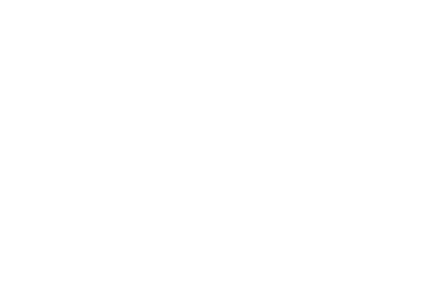

In [6]:
Image.open("figures/cocoa_percent_change_over_years.png")

From our table and plot above, we can see that the mean and median cocoa percent in chocolate bars have little changes over years, ranging from 70% to 75%, and we are able to conclude that there's little difference between the average cocoa percent in chocolate bars over years. However, from the plot and table, we can see that the maximum cocoa percent in chocolate bars has a sharp drop to 80%-85% over year 2017 to 2020. More data needs to be provided and more analysis needs to be done to explain that abnormal drop.